In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
def rand_walk_2d(init = [0.,0.], dt = 0.01, T = 10, D = 1., R = 10., rs=0):
    rstate = np.random.RandomState(rs)
    total_iter = int(T/dt)
    L = (D*2.*dt)**0.5
    path = np.zeros((total_iter+1,2))
    path[0] = init
    x, y = init
    for i in range(total_iter):
        flag = 0
        while (flag==0):
            theta = rstate.uniform(-np.pi,np.pi)
            dx = L*np.cos(theta)
            dy = L*np.sin(theta)
            x1,y1 = [x+dx,y+dy]
            if(x1**2 + y1**2 < R**2):
                flag = 1
                x = x1
                y = y1
                path[i+1] = [x,y]
    return path

In [7]:
rstate = np.random.RandomState(0)
n_inits = 5000
r = 1
R = 10
D = 1 #um2/s
dt = 0.01
T = 20.
L = (D*2.*dt)**0.5

In [8]:
#initialization
i=0
inits = np.zeros((n_inits,2))
while(i<n_inits):
    init = rstate.uniform(-10,10,2)
    r_init = np.sum(init**2.)**0.5
    if(r_init>1. and r_init<10.):
        inits[i] = init
        i+=1

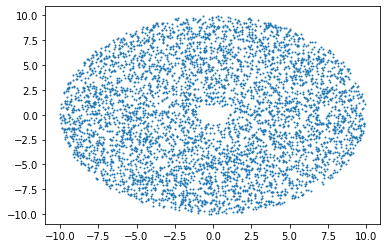

In [9]:
plt.scatter(inits[:,0],inits[:,1],s=1)

In [10]:
paths = np.zeros((int(T/dt)+1,2,n_inits))
for i in range(n_inits):
    paths[:,:,i] = rand_walk_2d(init=inits[i],dt=dt,T=T,D=D,R=R,rs=i+1)

In [11]:
N_t = np.zeros(int(T/dt)+1)
for i in range(int(T/dt)+1):
    N_t[i] = len(np.where(np.sqrt(paths[i,0,:]**2.+paths[i,1,:]**2.)<1.)[0])

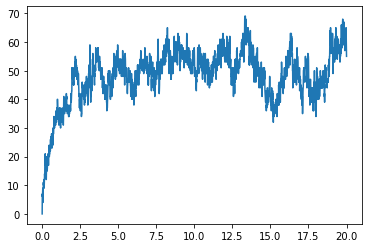

In [16]:
t = np.arange(0,T+dt/2,dt)
plt.plot(t,N_t)

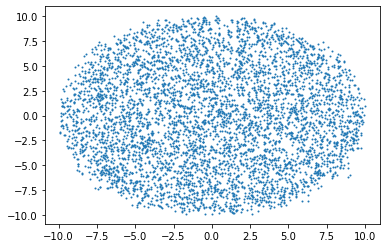

In [18]:
plt.scatter(paths[-100,0,:],paths[-1,1,:],s=1)

In [17]:
from scipy import special

In [36]:
def Nf(t,D):
    r = 1.
    R = 10.
    c0 = 5000/(np.pi*(R**2. - r**2.))
    c1 = 5000/(np.pi*R**2.)
    N1 = int(c1*np.pi*r**2.)
    
    tau_D = r**2./(4.*D)
    N_t = np.zeros(len(t))
    N_t[1:] = N1*np.exp(-2.*tau_D/t[1:])*(special.i0(2.*tau_D/t[1:]) + special.i1(2.*tau_D/t[1:]))
    return N_t

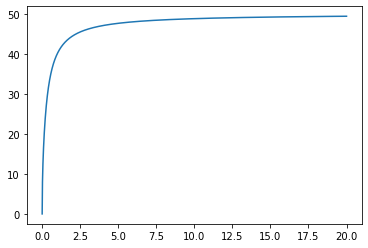

In [37]:
N_t_ex = Nf(t,D)
plt.plot(t,N_t_ex)

In [38]:
popt, pcov = curve_fit(Nf,t,N_t,p0=[D])
popt

array([0.73682637])

[]

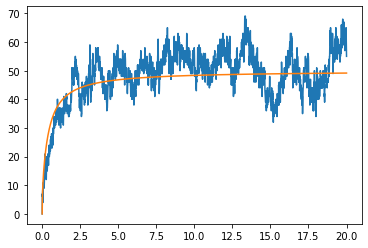

In [41]:
N_t_ex = Nf(t,popt[0])
plt.plot(t,N_t)
plt.plot(t,N_t_ex)
plt.plot()

In [43]:
N1 = int(n_inits/(R**2.)*(r**2.))
N_half = N1/2

for i in range(len(N_t)):
    if(N_t[i]>=N_half):
        t_half = t[i]
        break

In [44]:
t_half

0.55

In [46]:
print('t$_{1/2}$={}'.format(t_half))

KeyError: '1/2'